<a href="https://colab.research.google.com/github/harvinderchahal/DEC2024/blob/main/ngsim_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Set visualisation options
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)


In [14]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('ngsim.csv')  # Replace with the actual path to your dataset

# Display the first few rows of the dataset
print(data.head())

# Display basic statistics
print(data.describe())

# Display information about the dataset
print(data.info())


Saving ngsim.csv to ngsim.csv
   Vehicle_ID  Frame_ID  Total_Frames   Global_Time  Local_X   Local_Y  \
0         515      2330          1123  1.120000e+12   30.034   188.062   
1         515      2330          1123  1.120000e+12   30.034   188.062   
2        2224      6548          1902  1.110000e+12   41.429   472.901   
3        2127      6459           567  1.120000e+12   19.632  1775.614   
4        1033      4827           592  1.120000e+12    6.202  1701.144   

      Global_X     Global_Y  v_length  v_Width  ...  D_Zone  Int_ID  \
0  6451203.729  1873252.549      13.0      6.9  ...     NaN     NaN   
1  6451203.729  1873252.549      13.0      6.9  ...     NaN     NaN   
2  6042814.264  2133542.012      14.3      6.9  ...     NaN     NaN   
3  6452425.122  1872172.475      13.5      6.9  ...     NaN     NaN   
4  6452347.673  1872258.452      13.5      4.4  ...     NaN     NaN   

   Section_ID  Direction  Movement  Preceding  Following  Space_Headway  \
0         NaN        Na

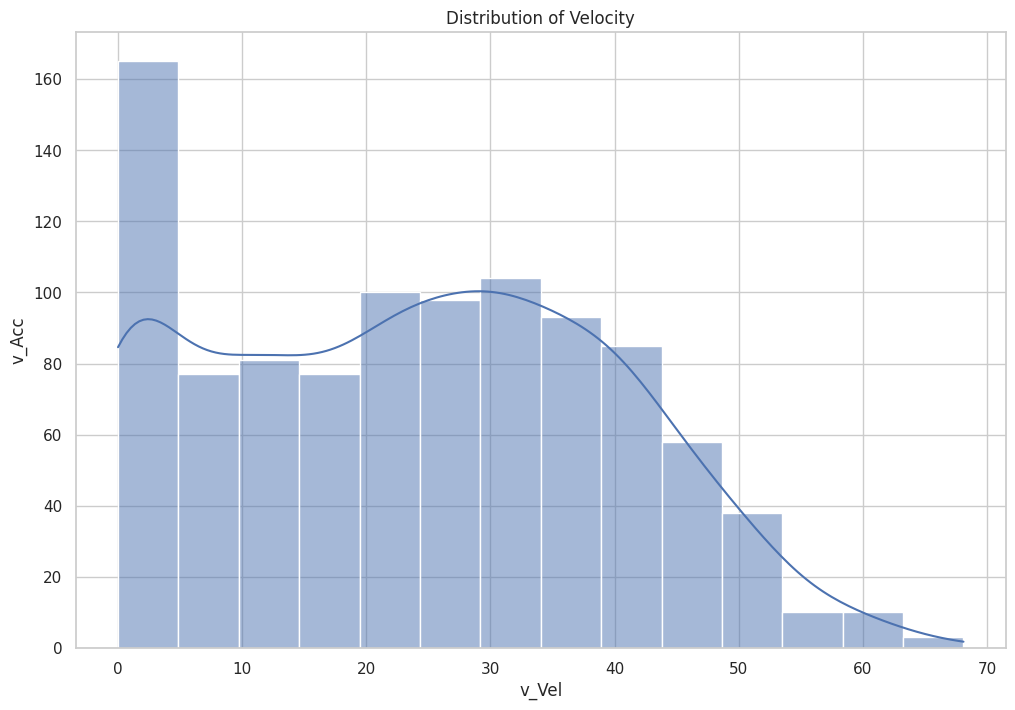

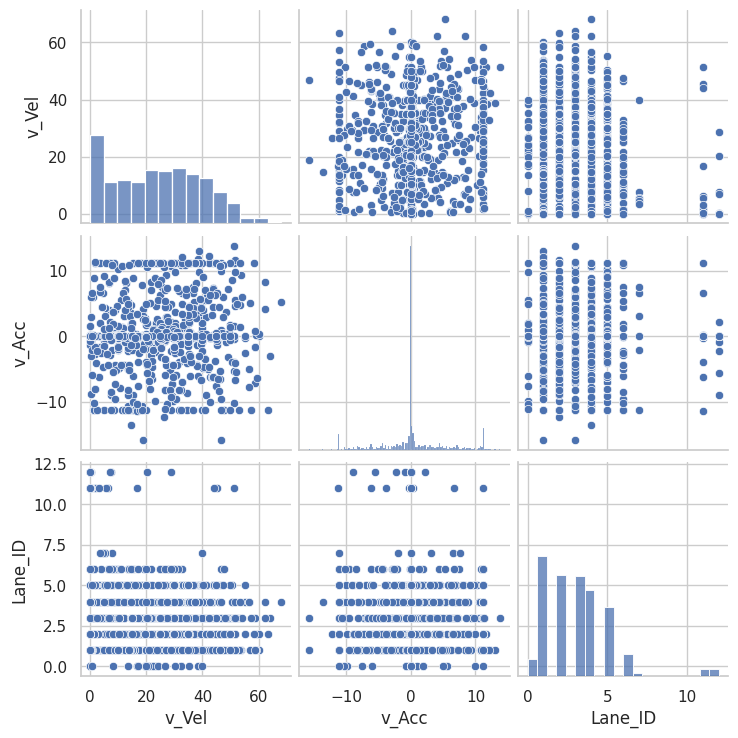

ValueError: could not convert string to float: 'us-101'

In [32]:
# Histogram of selected feature
plt.figure()
sns.histplot(data['v_Vel'], kde=True)  # Replace 'speed' with the actual feature name
plt.title('Distribution of Velocity')
plt.xlabel('v_Vel')
plt.ylabel('v_Acc')
plt.show()

# Pairplot for numerical features
sns.pairplot(data[['v_Vel', 'v_Acc', 'Lane_ID']])  # Replace with actual feature names
plt.show()

# Correlation matrix
corrcorr_matrix = data.corr()
numerical_data = self.data.select_dtypes(include=np.number)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [29]:
# Handle missing values (example: fill with mean for numerical features)
data.fillna(data.mean(), inplace=True)

# Encode categorical variables (if any)
data['Lane_ID'] = data['Lane_ID'].astype('v_Class').cat.codes  # Replace 'lane_id' with actual categorical feature

# Split the data into features and target variable
X = data[['speed', 'acceleration', 'lane_id']]  # Replace with actual feature names
y = data['target']  # Replace with actual target variable name

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TypeError: Could not convert ['us-101us-101i-80us-101us-101us-101us-101us-101us-101lankershimi-80lankershimi-80i-80i-80us-101us-101us-101us-101lankershimus-101us-101lankershimus-101lankershimlankershimus-101i-80us-101lankershimlankershimlankershimus-101lankershimus-101lankershimus-101us-101peachtreeus-101us-101peachtreei-80us-101us-101us-101us-101i-80us-101i-80i-80us-101us-101us-101us-101us-101us-101us-101us-101us-101us-101us-101i-80i-80us-101us-101us-101us-101i-80lankershimus-101lankershimus-101us-101lankershimus-101i-80us-101us-101us-101us-101us-101peachtreeus-101us-101us-101us-101us-101us-101us-101us-101lankershimus-101us-101us-101peachtreelankershimus-101us-101lankershimpeachtreeus-101us-101us-101i-80i-80us-101us-101us-101us-101us-101i-80us-101us-101us-101us-101us-101lankershimus-101i-80us-101us-101lankershimi-80i-80lankershimus-101us-101us-101lankershimi-80lankershimlankershimi-80lankershimlankershimus-101i-80us-101i-80us-101us-101us-101us-101i-80us-101lankershimus-101us-101us-101peachtreepeachtreeus-101us-101i-80us-101us-101us-101us-101i-80us-101i-80i-80us-101us-101us-101i-80i-80i-80lankershimi-80us-101lankershimus-101us-101lankershimlankershimus-101us-101us-101us-101i-80us-101us-101us-101us-101peachtreeus-101peachtreepeachtreeus-101us-101lankershimpeachtreei-80lankershimlankershimi-80i-80us-101i-80peachtreeus-101lankershimus-101us-101us-101us-101lankershimus-101us-101lankershimlankershimus-101us-101us-101i-80us-101us-101us-101us-101us-101us-101us-101us-101i-80i-80peachtreei-80i-80us-101i-80us-101lankershimpeachtreeus-101peachtreepeachtreeus-101i-80us-101lankershimus-101lankershimpeachtreeus-101i-80i-80us-101i-80peachtreeus-101i-80us-101i-80i-80us-101us-101lankershimus-101us-101i-80us-101us-101lankershimus-101i-80us-101i-80lankershimpeachtreepeachtreelankershimlankershimlankershimus-101us-101lankershimlankershimlankershimi-80i-80us-101peachtreei-80peachtreeus-101peachtreei-80us-101us-101lankershimi-80us-101lankershimi-80peachtreei-80us-101us-101us-101i-80peachtreeus-101us-101us-101i-80us-101us-101lankershimi-80peachtreepeachtreeus-101us-101us-101us-101lankershimlankershimus-101us-101us-101us-101us-101us-101peachtreei-80lankershimlankershimlankershimlankershimus-101us-101lankershimi-80lankershimus-101i-80lankershimi-80us-101us-101us-101us-101us-101i-80i-80us-101i-80peachtreeus-101us-101i-80peachtreei-80us-101i-80i-80peachtreei-80i-80us-101i-80i-80us-101i-80lankershimus-101peachtreeus-101us-101i-80lankershimus-101i-80lankershimus-101lankershimus-101i-80peachtreei-80us-101us-101us-101us-101i-80us-101us-101i-80peachtreeus-101i-80lankershimus-101lankershimi-80us-101us-101us-101i-80us-101us-101i-80i-80lankershimus-101lankershimus-101us-101us-101us-101us-101us-101us-101us-101lankershimus-101i-80us-101us-101us-101i-80us-101lankershimi-80us-101us-101peachtreeus-101lankershimi-80lankershimi-80us-101lankershimus-101us-101us-101us-101lankershimlankershimus-101i-80us-101lankershimus-101i-80us-101us-101i-80us-101us-101lankershimus-101us-101peachtreelankershimus-101i-80us-101us-101us-101us-101us-101i-80us-101peachtreelankershimus-101lankershimus-101peachtreeus-101us-101us-101us-101us-101us-101us-101i-80us-101us-101us-101us-101us-101lankershimpeachtreeus-101us-101i-80i-80lankershimlankershimus-101us-101peachtreeus-101us-101us-101i-80us-101us-101us-101i-80lankershimus-101peachtreelankershimus-101lankershimlankershimus-101us-101us-101us-101peachtreeus-101us-101lankershimi-80us-101us-101us-101us-101us-101us-101peachtreei-80us-101i-80lankershimus-101us-101us-101us-101peachtreeus-101us-101us-101lankershimlankershimus-101i-80us-101us-101us-101us-101us-101lankershimlankershimi-80i-80us-101us-101us-101us-101i-80i-80lankershimus-101i-80us-101lankershimus-101us-101us-101us-101lankershimus-101peachtreei-80i-80lankershimi-80us-101us-101peachtreei-80us-101us-101us-101i-80lankershimus-101i-80i-80us-101i-80peachtreeus-101us-101i-80us-101lankershimus-101us-101us-101lankershimus-101i-80us-101us-101us-101peachtreeus-101us-101lankershimus-101i-80i-80us-101i-80i-80us-101us-101us-101lankershimus-101i-80us-101peachtreepeachtreelankershimus-101i-80us-101peachtreelankershimus-101peachtreei-80us-101us-101lankershimus-101us-101us-101us-101us-101i-80us-101i-80us-101lankershimlankershimus-101lankershimus-101i-80i-80us-101i-80us-101us-101us-101us-101us-101us-101i-80us-101us-101lankershimlankershimus-101us-101us-101us-101i-80us-101us-101lankershimus-101us-101us-101us-101peachtreei-80us-101us-101us-101us-101peachtreelankershimus-101us-101lankershimlankershimus-101us-101i-80peachtreelankershimus-101us-101us-101us-101i-80us-101i-80i-80peachtreeus-101lankershimus-101us-101us-101us-101lankershimus-101us-101i-80us-101us-101peachtreeus-101i-80i-80us-101us-101us-101us-101i-80us-101i-80i-80us-101i-80lankershimus-101us-101i-80us-101us-101us-101us-101i-80lankershimi-80us-101us-101i-80us-101us-101us-101us-101us-101lankershimi-80lankershimlankershimlankershimlankershimus-101i-80peachtreeus-101us-101us-101i-80i-80us-101us-101us-101us-101lankershimi-80us-101us-101lankershimus-101us-101us-101us-101us-101i-80us-101us-101lankershimus-101i-80us-101peachtreeus-101lankershimus-101us-101us-101us-101us-101us-101lankershimlankershimi-80us-101lankershimi-80us-101us-101lankershimus-101us-101lankershimus-101i-80peachtreeus-101lankershimpeachtreelankershimpeachtreei-80lankershimlankershimi-80us-101us-101us-101us-101us-101peachtreepeachtreeus-101lankershimi-80i-80i-80us-101us-101peachtreei-80lankershimus-101i-80us-101lankershimlankershimpeachtreeus-101lankershimlankershimlankershimus-101us-101us-101us-101i-80peachtreelankershimus-101i-80us-101lankershimus-101us-101peachtreeus-101us-101us-101peachtreei-80us-101us-101us-101us-101lankershimpeachtreei-80us-101i-80i-80i-80us-101lankershimus-101us-101us-101us-101i-80lankershimus-101us-101peachtreeus-101us-101us-101i-80i-80peachtreei-80lankershimus-101us-101us-101us-101i-80us-101peachtreei-80lankershimlankershimlankershimi-80us-101us-101us-101us-101i-80us-101i-80us-101lankershimus-101lankershimus-101lankershimpeachtreeus-101i-80us-101lankershimlankershimus-101us-101us-101i-80peachtreei-80us-101us-101i-80us-101lankershimlankershimpeachtreelankershimlankershimus-101us-101peachtreelankershimlankershimus-101us-101us-101i-80i-80us-101i-80i-80lankershimi-80us-101us-101lankershimus-101us-101us-101us-101lankershimus-101us-101us-101i-80us-101i-80i-80i-80us-101us-101i-80us-101us-101us-101us-101i-80us-101lankershimpeachtreeus-101us-101i-80us-101lankershimus-101us-101us-101i-80i-80us-101us-101us-101us-101us-101lankershimi-80us-101us-101us-101'] to numeric

In [30]:
# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


NameError: name 'X_train' is not defined

In [31]:
# Confusion Matrix Heatmap
plt.figure()
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'y_test' is not defined

<Figure size 1200x800 with 0 Axes>